In [7]:
import pandas as pd

In [8]:
titanic = pd.read_csv('titanic-passengers.csv', sep =';')

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [11]:
titanic.drop('Cabin', axis= 1, inplace = True)

In [12]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)

In [14]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
titanic['Embarked'].fillna('S', inplace= True)

In [16]:
titanic['Age'] = titanic['Age'].astype('int')

In [17]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31,1,0,F.C. 12750,52.0000,S


In [20]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder as Lb

encoder = Lb()
titanic['Survived'] = encoder.fit_transform(titanic['Survived'])
titanic['Sex'] = encoder.fit_transform(titanic['Sex'])
titanic['Embarked'] = encoder.fit_transform(titanic['Embarked'])

In [21]:
#feature selection
y = titanic['Survived'].values
x = titanic[['Sex', 'Embarked', 'Age', 'Pclass', 'Fare']]

## Logistic Regression

In [22]:
# import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size = 0.2, random_state= 30)

model.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred = model.predict(x_test)

y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1])

In [24]:
print(f'Accuracy = {model.score(x_test, y_test)}')

Accuracy = 0.7262569832402235


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

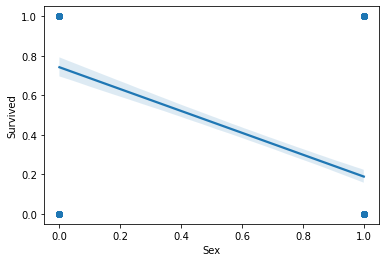

In [25]:
# Logistic regression Distribution

import seaborn as sns
sns.regplot(x= 'Sex' ,y = 'Survived', data=titanic)


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

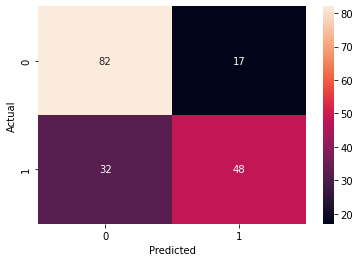

In [26]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#confusion matrix


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        99
           1       0.74      0.60      0.66        80

    accuracy                           0.73       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.73      0.73      0.72       179



In [28]:
print(f'Accuracy = {(48+82)/(82+17+32+48)}')

Accuracy = 0.7262569832402235


In [46]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, y_pred, pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
fpr, tpr, _= roc_curve(y_test, random_probs, pos_label=1)
print(fpr, tpr, _)

[0. 1.] [0. 1.] [1 0]


In [47]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, y_pred)

print(auc_score)

0.8006944444444444


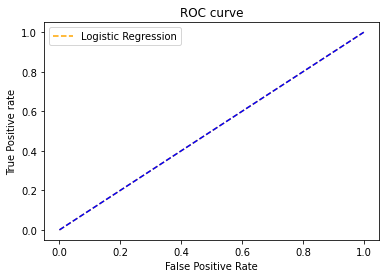

In [48]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr, tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

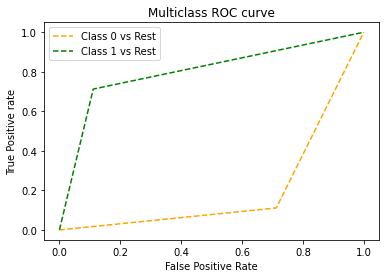

In [49]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred, pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

## K-Nearest Neighbor

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [30]:
knn = KNeighborsClassifier(5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn.predict(x_test)

In [32]:
print(f'The accuracy of the model is {accuracy_score(y_pred, y_test)}')

The accuracy of the model is 0.7206703910614525


In [33]:
print(f'The accuracy of the model on train data is {accuracy_score(knn.predict(x_train), y_train)}')

The accuracy of the model on train data is 0.7921348314606742


In [34]:
#to find the optimal k 
scores = []
for k in range(1,20):
  knn = KNeighborsClassifier(k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  print(f'{k} : {accuracy_score(y_pred, y_test)}')
  scores.append(accuracy_score(y_pred, y_test))

1 : 0.7206703910614525
2 : 0.659217877094972
3 : 0.7374301675977654
4 : 0.6927374301675978
5 : 0.7206703910614525
6 : 0.6871508379888268
7 : 0.7318435754189944
8 : 0.7039106145251397
9 : 0.7150837988826816
10 : 0.6871508379888268
11 : 0.6871508379888268
12 : 0.6703910614525139
13 : 0.664804469273743
14 : 0.6983240223463687
15 : 0.6871508379888268
16 : 0.6927374301675978
17 : 0.6871508379888268
18 : 0.6983240223463687
19 : 0.6983240223463687


Text(0.5, 1.0, 'Testing Accuracy for the Value of K')

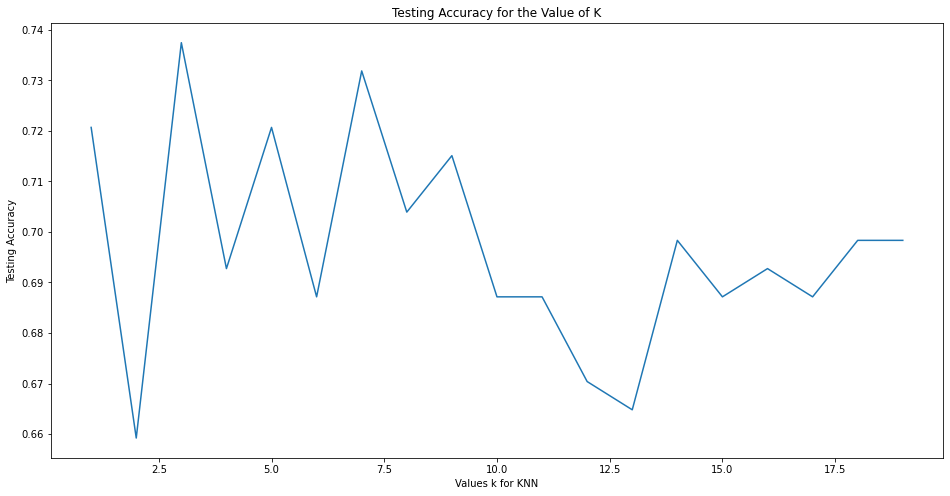

In [35]:
# Optimal K Value Plot
import matplotlib.pyplot as plt

plt.figure(figsize= (16, 8))
plt.plot(range(1,20), scores)
plt.xlabel('Values k for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for the Value of K')

The best/optimal of K for this model is 3. It has the highest accuracy score of 0.74.

## Decision Tree

In [36]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()

In [37]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred =dt.predict(x_test)

In [39]:
print(f'Accuracy of test data = {accuracy_score(y_pred, y_test)}')

Accuracy of test data = 0.8100558659217877


In [40]:
print(f'Accuracy of training data = {accuracy_score(dt.predict(x_train), y_train)}')

Accuracy of training data = 0.9817415730337079


In [44]:
!pip install graphviz

In [56]:
!pip install dtreeviz

     |████████████████████████████████| 83 kB 434 kB/s eta 0:00:01


In [51]:
dtree = tree.DecisionTreeClassifier(criterion= 'gini', splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)

[Text(0.3034287084398977, 0.9761904761904762, 'Sex <= 0.5\ngini = 0.465\nsamples = 712\nvalue = [450, 262]\nclass = Yes'),
 Text(0.17540494458653028, 0.9285714285714286, 'Pclass <= 2.5\ngini = 0.377\nsamples = 246\nvalue = [62, 184]\nclass = No'),
 Text(0.06308610400682012, 0.8809523809523809, 'Age <= 2.5\ngini = 0.1\nsamples = 132\nvalue = [7, 125]\nclass = No'),
 Text(0.04092071611253197, 0.8333333333333334, 'Fare <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Yes'),
 Text(0.03410059676044331, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'),
 Text(0.04774083546462063, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.08525149190110827, 0.8333333333333334, 'Fare <= 22.0\ngini = 0.088\nsamples = 130\nvalue = [6, 124]\nclass = No'),
 Text(0.061381074168797956, 0.7857142857142857, 'Age <= 56.0\ngini = 0.231\nsamples = 30\nvalue = [4, 26]\nclass = No'),
 Text(0.05456095481670929, 0.7380952380952381, 'Fare <= 20.25\

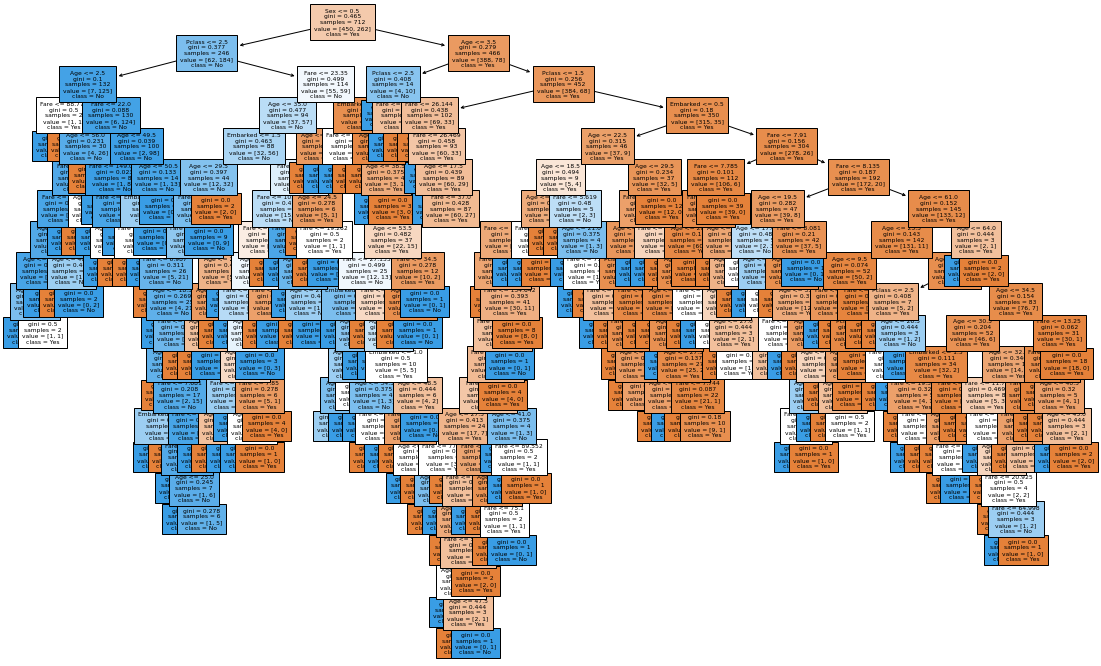

In [89]:
plt.figure(figsize=(19,12))
feature_names = list(x_train.columns)
classes = ['Yes', 'No']

tree.plot_tree(dt, feature_names=feature_names, class_names=classes,fontsize=6, filled=True)


## Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier 

In [110]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [112]:
y_pred = rf.predict(x_test)

In [114]:
print(f'The accuracy for the test data : {accuracy_score(y_pred, y_test)}')

The accuracy for the test data : 0.7932960893854749


In [115]:
Y_pred_train = model.predict(x_train)

print(f'The accuracy for the training data : {accuracy_score(Y_pred_train, y_train)}')

The accuracy for the training data : 0.8132022471910112


In [116]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators = 5)
scores = cross_val_score(rf, x, y, cv = 5)

print(f'Accuracy on each fold : {scores}')
print(f'Accuracy of the accuracy : {sum(scores)/5}')

Accuracy on each fold : [0.78212291 0.84269663 0.78089888 0.75842697 0.7752809 ]
Accuracy of the accuracy : 0.7878852551628899


In [119]:
# random forest with a different estimator

scores = []
for e in range(1,10):
    rf = RandomForestClassifier(e)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(f'The accuracy for the test data {e} esimator: {accuracy_score(y_pred, y_test)}')
    scores.append(accuracy_score(y_pred, y_test))

The accuracy for the test data 1 esimator: 0.7486033519553073
The accuracy for the test data 2 esimator: 0.7597765363128491
The accuracy for the test data 3 esimator: 0.8156424581005587
The accuracy for the test data 4 esimator: 0.8044692737430168
The accuracy for the test data 5 esimator: 0.7932960893854749
The accuracy for the test data 6 esimator: 0.8100558659217877
The accuracy for the test data 7 esimator: 0.7932960893854749
The accuracy for the test data 8 esimator: 0.8268156424581006
The accuracy for the test data 9 esimator: 0.8268156424581006


The best/optimal number of estimator for this model is 8. It has the highest accuracy score of 0.83

# CONCLUSION

The Accuracies of each Supervised Classification Learning are as follows;

Logistic Regression = 0.7262569832402235,
K-NN = 0.7374301675977654,
Decision Tree = 0.8268156424581006,
Random Forest = 0.8268156424581006.


According to the list above the Decision tree and Random Forest has the highest prediction accuracy.